In [1]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
from scipy.integrate import cumtrapz
import math

# import function from another file
from ipynb.fs.full.functions import getMaxRadiusProfile

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

[[2.4307299020162474]]
[array([13500])]
-----
[2.4307299020162474]
13500
Looking for the profile closest to model #13500 in /Users/emilyflynn/Desktop/1.0M_Sun/
Actual model number: 13500
Difference between target and actual model: 0
File path: /Users/emilyflynn/Desktop/1.0M_Sun/LOGS/profile276.data



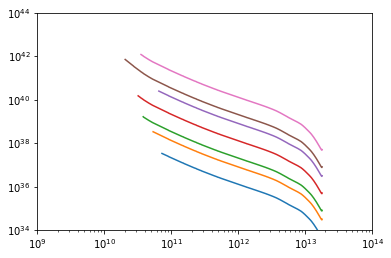

In [6]:
directory = '/Users/emilyflynn/Desktop/1.0M_Sun/'
p = getMaxRadiusProfile(directory)

def plotDragLum(p, m2):
    
    coreMass = p.he_core_mass + p.c_core_mass + p.o_core_mass + p.si_core_mass + p.fe_core_mass
    # change from Msuns to grams
    coreMass = coreMass*1.989e33
    
    def getR2(m):
        if (m > 0.077):
            r = m**0.92
        elif (m < 0.0026):
            r = 0.10045 # r_jupiter
        else:
            r = 0.117
            r = r - 0.054*(log(m/0.0026)**2)
            r = r + 0.024*(log(m/0.0026)**3)
        return r
    
    # get rshred
    r2 = getR2(m2)
    m2 = m2*1.989e33 # units
    r2 = r2*69.551e9 # units
    rshred = r2 * (2*coreMass/m2)**(1/3)

    radius = p.radius
    radius = radius*69.551e9

    masses = p.mass
    masses = masses*1.989e33

    vkep_r = np.sqrt(G * masses / radius)

    rho = p.logRho
    rho = 10**rho

    xi = 4

    rAcc = 2 * G * m2 / vkep_r**2

    dragLum = xi * math.pi * rAcc**2 * rho * vkep_r**3
    
    # stop at rshred
    i = 0
    for x in radius:
        if x > rshred:
            i+=1

    radius = radius[:i]
    dragLum = dragLum[:i]

    plt.loglog(radius[100:], dragLum[100:])

# plt.yscale('log')
# plt.xscale('log')
plt.xlim(1e9, 1e14)
plt.ylim(1e34, 1e44)

plotDragLum(p, 0.002)
plotDragLum(p, 0.005)
plotDragLum(p, 0.008)
plotDragLum(p, 0.02)
plotDragLum(p, 0.05)
plotDragLum(p, 0.08)
plotDragLum(p, 0.2)